<h2>Check last cell for results</h2>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
marketing = pd.read_csv("bank-marketing.csv")

In [185]:
marketing.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [186]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [187]:
marketing.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [188]:
df = marketing.groupby(marketing["education"]).median()
df.head()

,age,salary,balance,day,duration,campaign,pdays,previous
education,,,,,,,,
primary,45,20000,403,15,178,2,-1,0
secondary,38,55000,392,16,183,2,-1,0
tertiary,37,100000,577,17,176,2,-1,0
unknown,45,50000,568,16,180,2,-1,0


<AxesSubplot:xlabel='education', ylabel='balance'>

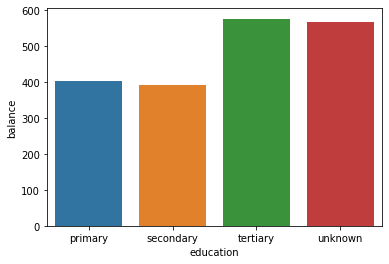

In [189]:
sns.barplot(x=df.index,y=df["balance"])

<h2>Tertiary education has max balance among other groups</h2>

In [190]:
marketing.groupby(marketing["job"]).mean()

,age,salary,balance,day,duration,campaign,pdays,previous
job,,,,,,,,
admin.,39.289886,50000.0,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,20000.0,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,120000.0,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,16000.0,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,100000.0,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,55000.0,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,60000.0,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,70000.0,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,4000.0,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [191]:
marketing["response"].replace({"yes":1,"no":0},inplace=True)
marketing["targeted"].replace({"yes":1,"no":0},inplace=True)
marketing["default"].replace({"yes":1,"no":0},inplace=True)
marketing["housing"].replace({"yes":1,"no":0},inplace=True)
marketing["loan"].replace({"yes":1,"no":0},inplace=True)

<h2>1 - Yes</h2>
<h2>0 - No</h2>

In [192]:
marketing.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [193]:
marketing["response"].value_counts()

0    39922
1     5289
Name: response, dtype: int64

<AxesSubplot:xlabel='response', ylabel='age'>

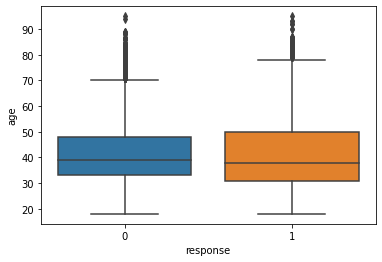

In [194]:
sns.boxplot(x=marketing["response"],y=marketing["age"])

In [195]:
marketing.head(10)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,100000,married,tertiary,1,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,100000,single,tertiary,0,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,120000,divorced,tertiary,0,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,55000,married,primary,1,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,60000,single,secondary,1,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0


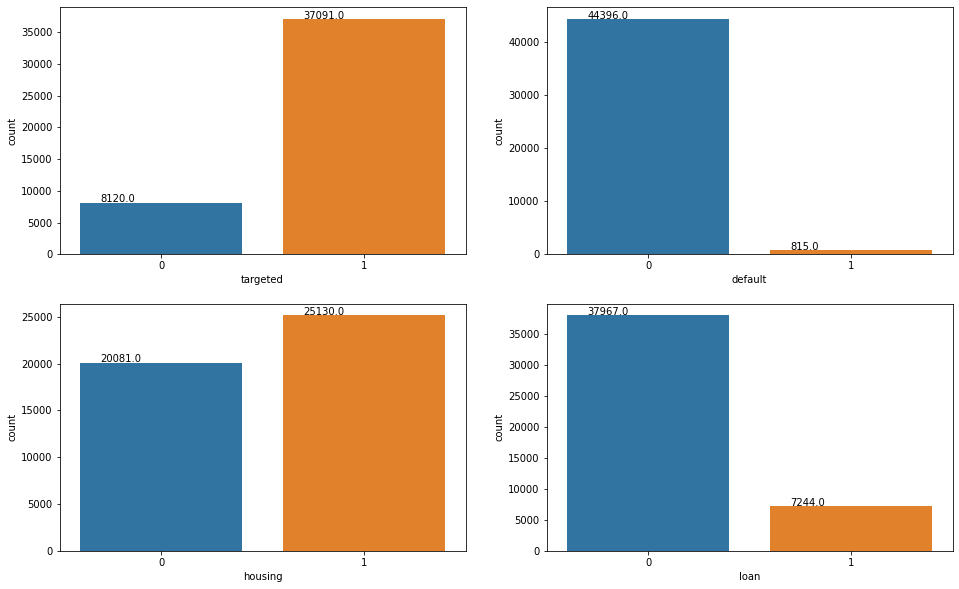

In [196]:
fig,axes = plt.subplots(2,2,figsize=(16,10))
g1 = sns.countplot(x="targeted",data=marketing,ax=axes[0,0])
for p in g1.patches:
        g1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
g2 = sns.countplot(x="default",data=marketing,ax=axes[0,1])
for p in g2.patches:
        g2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

g3 = sns.countplot(x="housing",data=marketing,ax=axes[1,0])
for p in g3.patches:
        g3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

g4 = sns.countplot(x="loan",data=marketing,ax=axes[1,1])
for p in g4.patches:
        g4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))



In [197]:
positive_marketing = marketing[marketing["response"]==1]

In [198]:
positive_marketing.describe()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,58770.277935,0.747589,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354,1.0
std,13.497781,32207.363681,0.434437,0.098676,3501.104777,0.481714,0.288361,8.501875,392.525262,1.921826,118.822266,2.553272,0.0
min,18.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,8.000000,1.000000,-1.000000,0.000000,1.0
25%,31.000000,50000.000000,0.000000,0.000000,210.000000,0.000000,0.000000,8.000000,244.000000,1.000000,-1.000000,0.000000,1.0
50%,38.000000,60000.000000,1.000000,0.000000,733.000000,0.000000,0.000000,15.000000,426.000000,2.000000,-1.000000,0.000000,1.0
75%,50.000000,100000.000000,1.000000,0.000000,2159.000000,1.000000,0.000000,22.000000,725.000000,3.000000,98.000000,1.000000,1.0
max,95.000000,120000.000000,1.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,32.000000,854.000000,58.000000,1.0


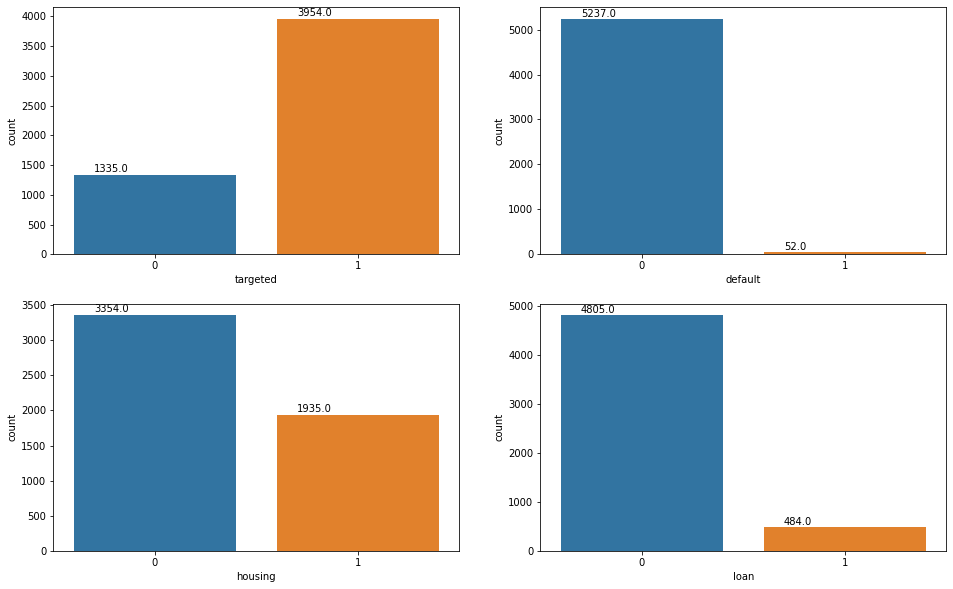

In [199]:
fig,axes = plt.subplots(2,2,figsize=(16,10))
g1 = sns.countplot(x="targeted",data=positive_marketing,ax=axes[0,0])
for p in g1.patches:
        g1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
g2 = sns.countplot(x="default",data=positive_marketing,ax=axes[0,1])
for p in g2.patches:
        g2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

g3 = sns.countplot(x="housing",data=positive_marketing,ax=axes[1,0])
for p in g3.patches:
        g3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

g4 = sns.countplot(x="loan",data=positive_marketing,ax=axes[1,1])
for p in g4.patches:
        g4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


<h2>Conclusion</h2>
<ol>
    <li>Most of the people who responded positively were targeted</li>
    <li>Most of the people who responded positively had credit in their default</li>
    <li>Most of the people who responded positively had no housing loan</li>
    <li>Most of the people who responded positively had no personal loan</li>
</ol>


In [200]:
marketing["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [201]:
marketing[marketing['poutcome']=="success"]["response"].value_counts()

1    978
0    533
Name: response, dtype: int64

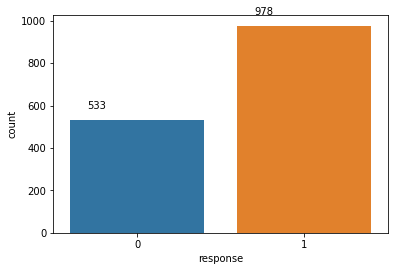

In [202]:
g = sns.countplot(x=marketing[marketing['poutcome']=="success"]["response"])
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [203]:
positive_marketing.shape

(5289, 19)

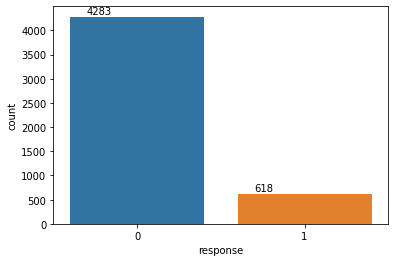

In [204]:
g = sns.countplot(x=marketing[marketing['poutcome']=="failure"]["response"])
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

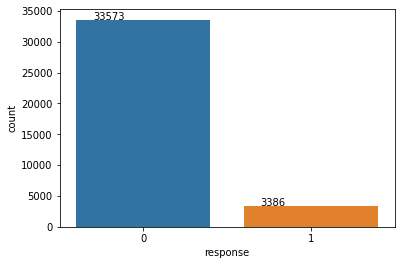

In [205]:
g = sns.countplot(x=marketing[marketing['poutcome']=="unknown"]["response"])
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

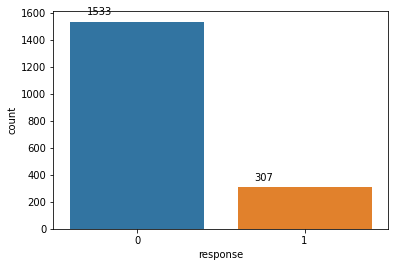

In [206]:
g = sns.countplot(x=marketing[marketing['poutcome']=="other"]["response"])
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

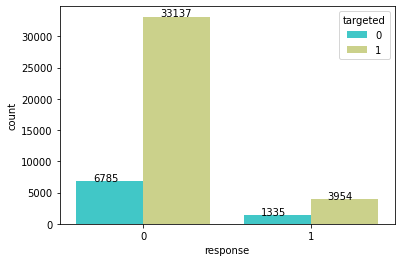

In [207]:
g = sns.countplot(x="response",hue="targeted",data=marketing,palette="rainbow")
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

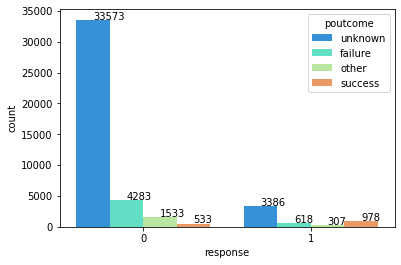

In [208]:
g = sns.countplot(x="response",hue="poutcome",data=marketing,palette="rainbow")
for p in g.patches:
        g.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<AxesSubplot:xlabel='age'>

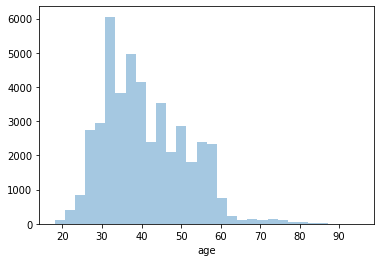

In [209]:
sns.distplot(marketing["age"],kde=False,bins=30)

<AxesSubplot:>

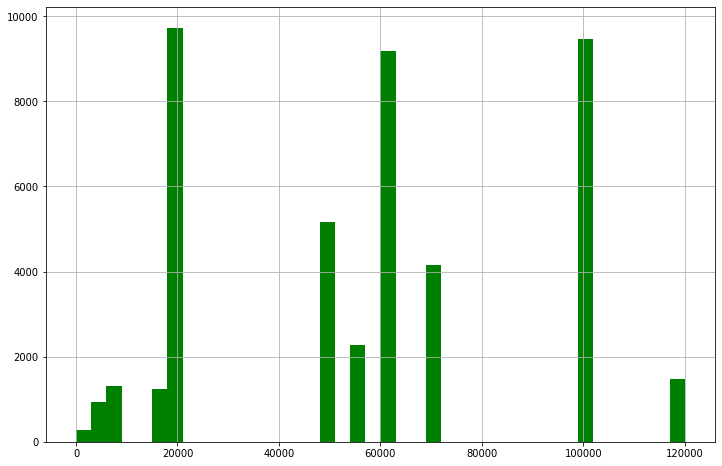

In [210]:
marketing["salary"].hist(color="green",bins=40,figsize=(12,8))

In [211]:
marketing.groupby(marketing["job"]).mean()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,pdays,previous,response
job,,,,,,,,,,,,,
admin.,39.289886,50000.0,0.903114,0.014311,1135.838909,0.615355,0.191646,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,20000.0,0.944205,0.020654,1078.826654,0.724209,0.173037,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,120000.0,0.792199,0.036987,1521.470074,0.584398,0.239408,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,16000.0,0.916129,0.017742,1392.395161,0.320968,0.122581,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,100000.0,0.604250,0.017340,1763.616832,0.494608,0.132480,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,55000.0,0.897968,0.011484,1984.215106,0.216873,0.136484,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,60000.0,0.732742,0.020899,1647.970868,0.484484,0.145028,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,70000.0,0.937169,0.018055,997.088108,0.665864,0.201252,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,4000.0,0.611940,0.003198,1388.060768,0.265458,0.012793,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [212]:
marketing[marketing["pdays"]==-1].count()

age          36954
job          36954
salary       36954
marital      36954
education    36954
targeted     36954
default      36954
balance      36954
housing      36954
loan         36954
contact      36954
day          36954
month        36954
duration     36954
campaign     36954
pdays        36954
previous     36954
poutcome     36954
response     36954
dtype: int64

In [213]:
def fill_pdays(cols):
    job = cols[0]
    pdays = cols[1]
    
    if pdays == -1 or pd.isnull(pdays):
        
        if job ==  "admin.":
            return 48
        elif job == "blue-collar":
            return 44
        elif job == "entrepreneur":
            return 32
        elif job == "housemaid":
            return 22
        elif job == "management":
            return 39
        elif job == "retired":
            return 37
        elif job == "self-employed":
            return 35
        elif job == "services":
            return 42
        elif job == "student":
            return 57
        elif job == "technician":
            return 37
        elif job == "unemployed":
            return 34
        else:
            return 21
    else:
        return pdays

In [214]:
marketing["pdays"] = marketing[["job","pdays"]].apply(fill_pdays,axis=1)

In [215]:
marketing["pdays"].isnull().value_counts()

False    45211
Name: pdays, dtype: int64

In [216]:
marketing.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,39,0,unknown,0
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,37,0,unknown,0
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,32,0,unknown,0
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,44,0,unknown,0
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,21,0,unknown,0


In [217]:
marketing.drop(["job","contact","day","month"],axis=1,inplace=True)

In [218]:
marketing.head()

,age,salary,marital,education,targeted,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response
0,58,100000,married,tertiary,1,0,2143,1,0,261,1,39,0,unknown,0
1,44,60000,single,secondary,1,0,29,1,0,151,1,37,0,unknown,0
2,33,120000,married,secondary,1,0,2,1,1,76,1,32,0,unknown,0
3,47,20000,married,unknown,0,0,1506,1,0,92,1,44,0,unknown,0
4,33,0,single,unknown,0,0,1,0,0,198,1,21,0,unknown,0


In [219]:
marketing["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [220]:
marketing["education"].replace({"primary":1,"secondary":2,"tertiary":3,"unknown":0},inplace=True)
marketing["marital"].replace({"unknown":-1,"divorced":0,"single":1,"married":2},inplace=True)

In [221]:
marketing["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [222]:
marketing["poutcome"].replace({"unknown":-1,"failure":0,"success":1,"other":2},inplace=True)

In [223]:
marketing.head()

,age,salary,marital,education,targeted,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2,3,1,0,2143,1,0,261,1,39,0,-1,0
1,44,60000,1,2,1,0,29,1,0,151,1,37,0,-1,0
2,33,120000,2,2,1,0,2,1,1,76,1,32,0,-1,0
3,47,20000,2,0,0,0,1506,1,0,92,1,44,0,-1,0
4,33,0,1,0,0,0,1,0,0,198,1,21,0,-1,0


<h2>Train Test Split</h2>

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train,X_test,y_train,y_test = train_test_split(marketing.drop("response",axis=1),
                                                marketing["response"],test_size=0.25,
                                                random_state=101)

<h2>Logistic Regression</h2>

In [226]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [228]:
results = confusion_matrix(y_test,predictions)
results

array([[9767,  178],
       [1122,  236]], dtype=int64)

In [229]:
accuracy_score(y_test,predictions)

0.8849862868265063

In [230]:
y_test[:10]

37199    0
20751    0
554      0
37464    0
35798    0
40297    0
35781    0
15287    1
40663    0
18113    0
Name: response, dtype: int64

In [231]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [232]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9945
           1       0.57      0.17      0.27      1358

    accuracy                           0.88     11303
   macro avg       0.73      0.58      0.60     11303
weighted avg       0.86      0.88      0.86     11303



duration is one of the important feature of my model

In [233]:
importance = logmodel.coef_[0]

<AxesSubplot:>

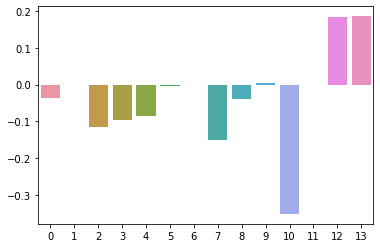

In [234]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],y=importance)

According to Logistic regression model the important features are: balance, duration, pdays, previous, poutcome 

<h2>Random Forest</h2>

In [235]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50,criterion="entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [236]:
rdt_predictions = classifier.predict(X_test)

In [237]:
print(confusion_matrix(y_test,rdt_predictions))

[[9679  266]
 [ 853  505]]


In [238]:
print(accuracy_score(y_test,rdt_predictions))

0.9009997345837388


In [239]:
print(classification_report(y_test,rdt_predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9945
           1       0.65      0.37      0.47      1358

    accuracy                           0.90     11303
   macro avg       0.79      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



In [240]:
rdt_importance = classifier.feature_importances_

<AxesSubplot:>

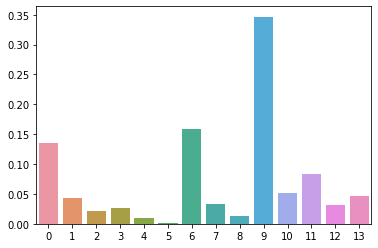

In [241]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],y=rdt_importance)

According to Random Forest model the important features are: age, balance,duration,campaign,pdays,poutcome

Random Forest has better performance as it got 90% accuracy 

The common features are balance, duration, pdays and poutcome

In [242]:
marketing.head()

,age,salary,marital,education,targeted,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2,3,1,0,2143,1,0,261,1,39,0,-1,0
1,44,60000,1,2,1,0,29,1,0,151,1,37,0,-1,0
2,33,120000,2,2,1,0,2,1,1,76,1,32,0,-1,0
3,47,20000,2,0,0,0,1506,1,0,92,1,44,0,-1,0
4,33,0,1,0,0,0,1,0,0,198,1,21,0,-1,0
